In [ ]:
!pip install fastai==2.2.5

     |████████████████████████████████| 194kB 17.4MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


# Lesson 1


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate

In [ ]:
bs=64

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7f157808a730>, timeout=4)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [ ]:
path = untar_data(URLs.PETS);path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
img_path = path/'images'
anno_path = path/'annotations'

In [ ]:
fname = get_image_files(img_path)
fname[:5]

(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_50.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_117.jpg')]

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
data = ImageDataLoaders.from_name_re(img_path, fname, pat, item_tfms=Resize(224))

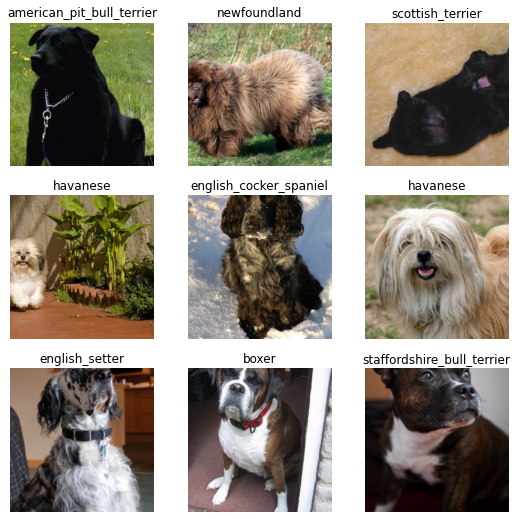

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.893315,0.377990,0.131935,00:47
1,0.660758,0.254296,0.079838,00:46
2,0.373881,0.236257,0.074425,00:47
3,0.268892,0.224172,0.070365,00:47


In [ ]:
learn.save('stage-1')

Path('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

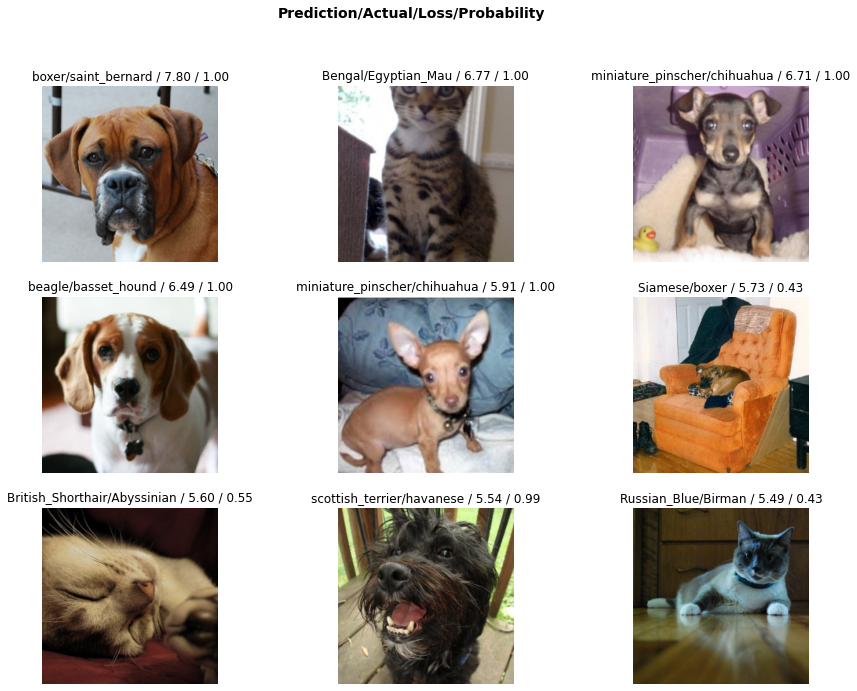

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Interpretation.plot_top_losses(k, largest=True, **kwargs)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


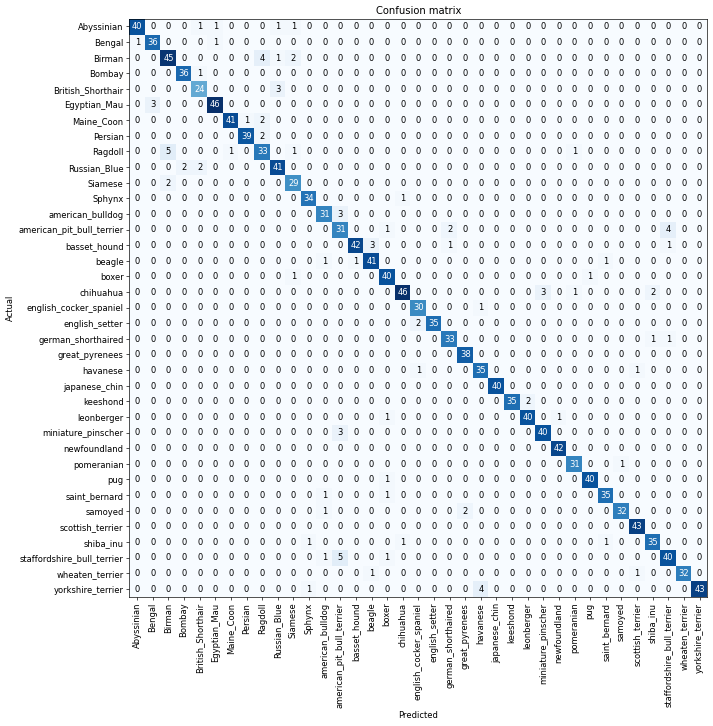

In [ ]:
doc(interp.plot_top_losses)

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'german_shorthaired', 2),
 ('chihuahua', 'shiba_inu', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'leonberger', 2),
 ('samoyed', 'great_pyrenees', 2)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.170445,0.636760,0.196211,00:50


In [ ]:
learn.load('stage-1')

SuggestedLRs(lr_min=1.3182566908653825e-05, lr_steep=7.585775847473997e-07)

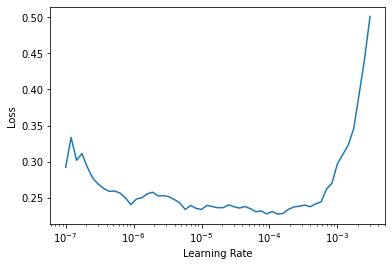

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.152586,0.253375,0.075778,00:50
1,0.101422,0.227887,0.065629,00:49
